In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn

In [43]:
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

%config InlineBackend.figure_format = 'retina'

In [44]:
import pandas as pd
import requests

consumer_key = '28e3aa317cac477a941a'
consumer_secret = '766939952f8246a1ad2b'

url = f'https://sgisapi.kostat.go.kr/OpenAPI3/auth/authentication.json?consumer_key={consumer_key}&consumer_secret={consumer_secret}'
res = requests.get(url)
data= res.json()

accessToken = data['result']['accessToken']
accessToken

'6551f4ab-aff7-471e-bfb9-165a80b34377'

In [45]:
import pandas as pd

area_no = pd.read_excel('adm_code.xls')
area_no

,시도코드,시도명칭,시군구코드,시군구명칭,읍면동코드,읍면동명칭
0,11,서울특별시,10,종로구,530,사직동
1,11,서울특별시,10,종로구,540,삼청동
2,11,서울특별시,10,종로구,550,부암동
3,11,서울특별시,10,종로구,560,평창동
4,11,서울특별시,10,종로구,570,무악동
...,...,...,...,...,...,...
3523,39,제주특별자치도,20,서귀포시,580,서홍동
3524,39,제주특별자치도,20,서귀포시,590,대륜동
3525,39,제주특별자치도,20,서귀포시,600,대천동
3526,39,제주특별자치도,20,서귀포시,610,중문동


In [46]:
goo_list = []
dong_list = []
area_no_list = []
for i in range(0, 426):
    area_no_list.append(area_no.iloc[i][0] * 1000000 + area_no.iloc[i][2] * 1000 + area_no.iloc[i][4])
    goo_list.append(area_no.iloc[i][3])
    dong_list.append(area_no.iloc[i][5])
print(area_no_list)
print(goo_list)
print(dong_list)
unique_goo_list = list(set(goo_list))


[11010530, 11010540, 11010550, 11010560, 11010570, 11010580, 11010600, 11010610, 11010630, 11010640, 11010670, 11010680, 11010690, 11010700, 11010710, 11010720, 11010730, 11020520, 11020540, 11020550, 11020570, 11020580, 11020590, 11020600, 11020650, 11020670, 11020680, 11020690, 11020700, 11020710, 11020720, 11020730, 11030510, 11030520, 11030530, 11030570, 11030580, 11030590, 11030630, 11030640, 11030650, 11030660, 11030690, 11030700, 11030710, 11030720, 11030730, 11030740, 11040520, 11040540, 11040550, 11040560, 11040570, 11040580, 11040590, 11040620, 11040650, 11040660, 11040670, 11040680, 11040690, 11040700, 11040710, 11040720, 11040730, 11050530, 11050540, 11050550, 11050560, 11050570, 11050580, 11050590, 11050600, 11050610, 11050620, 11050630, 11050640, 11050650, 11050660, 11050670, 11060710, 11060720, 11060730, 11060800, 11060810, 11060820, 11060830, 11060840, 11060860, 11060870, 11060880, 11060890, 11060900, 11060910, 11070520, 11070540, 11070550, 11070570, 11070590, 11070600,

In [47]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

## 인구수

In [92]:
# 인구수 데이터 가져오기
import requests

year = 2022
population = pd.DataFrame(columns=['행정동 코드', '행정구역명', '인구수', '평균나이'])

for adm_cd in area_no_list:
    population_url = f'https://sgisapi.kostat.go.kr/OpenAPI3/stats/searchpopulation.json?year={year}&adm_cd={adm_cd}&accessToken={accessToken}'
    # Add headers if needed
    headers = {'Content-Type': 'application/json'}
    res = requests.get(population_url, headers=headers)
    
    if res.status_code != 200:
        print(f"Error: {res.status_code}")
        continue

    data = res.json()
    if 'result' in data:
        items = data['result']
        df = pd.DataFrame(items).rename(columns={'adm_cd' : '행정동 코드', 'adm_nm':'행정구역명', 'population':'인구수', 'avg_age':'평균나이'})
        population = population.append(df, ignore_index=True)

population['인구수'] = population['인구수'].astype(int)
df_p = population[['행정구역명', '인구수']]
df_goo = pd.DataFrame(goo_list).rename(columns={0:'소속구'})
df_p = pd.concat([df_goo, df_p], axis=1)
df_p = df_p.groupby('소속구').sum()
df_p = df_p.reset_index()
df_p

,소속구,인구수
0,강남구,487153
1,강동구,438900
2,강북구,279828
3,강서구,543655
4,관악구,470221
5,광진구,324047
6,구로구,378227
7,금천구,220466
8,노원구,486285
9,도봉구,298358


## 사업체수, 종사자수

In [93]:
# 사업체수, 종사자수 데이터 가져오기
import requests

year = 2021
company = pd.DataFrame(columns=['행정동 코드', '행정구역명', '사업체수(개)', '종사자수(명)'])

for adm_cd in area_no_list:
    company_url = f'https://sgisapi.kostat.go.kr/OpenAPI3/stats/company.json?year={year}&adm_cd={adm_cd}&accessToken={accessToken}'
    headers = {'Content-Type': 'application/json'}

    res = requests.get(company_url, headers=headers)

    data = res.json()
    items = data['result']
    df = pd.DataFrame(items).rename(columns={'adm_cd' : '행정동 코드', 'adm_nm':'행정구역명', 'corp_cnt':'사업체수(개)', 'tot_worker':'종사자수(명)'})
    company = company.append(df, ignore_index=True)
company['사업체수(개)'] = company['사업체수(개)'].astype(int)
company['종사자수(명)'] = company['종사자수(명)'].astype(int)
df_goo = pd.DataFrame(goo_list).rename(columns={0:'소속구'})
df_company = company[['행정구역명', '사업체수(개)', '종사자수(명)']].head(426)
df_company = pd.concat([df_goo, df_company], axis=1)
df_company = df_company.groupby('소속구').sum()
df_company = df_company.reset_index()
df_company

,소속구,사업체수(개),종사자수(명)
0,강남구,108512,800269
1,강동구,37242,153049
2,강북구,23706,77529
3,강서구,52865,283547
4,관악구,34064,124560
5,광진구,31751,127761
6,구로구,48818,236487
7,금천구,45848,253100
8,노원구,32069,127564
9,도봉구,20746,74516


In [94]:
df_bussiness = df_company.drop(['종사자수(명)'], axis=1)
df_bussiness

,소속구,사업체수(개)
0,강남구,108512
1,강동구,37242
2,강북구,23706
3,강서구,52865
4,관악구,34064
5,광진구,31751
6,구로구,48818
7,금천구,45848
8,노원구,32069
9,도봉구,20746


In [96]:
df_worker = df_company.drop(['사업체수(개)'], axis=1)
df_worker

,소속구,종사자수(명)
0,강남구,800269
1,강동구,153049
2,강북구,77529
3,강서구,283547
4,관악구,124560
5,광진구,127761
6,구로구,236487
7,금천구,253100
8,노원구,127564
9,도봉구,74516


## 자동차 등록대수

In [54]:
# 자동차 등록대수 데이터 가져오기
import pandas as pd
register_car = pd.read_excel('car.xlsx')

register_car[['시군구', '총계']]

,시군구,총계
0,강남구,253856
1,강동구,154020
2,강북구,74549
3,강서구,205821
4,관악구,118303
5,광진구,97627
6,구로구,147818
7,금천구,92139
8,노원구,152510
9,도봉구,95127


## 역 개수

In [55]:
# 역 개수 데이터 가져오기
num_subway = pd.read_csv('num_subway.CSV', encoding='cp949')
num_subway_df = pd.DataFrame(num_subway)
num_subway_df[['자치구', '역개수']]

,자치구,역개수
0,강남구,21
1,강동구,14
2,강북구,3
3,강서구,9
4,관악구,4
5,광진구,11
6,구로구,7
7,금천구,1
8,노원구,13
9,도봉구,3


## 대학교 개수

In [56]:
# 대학교 개수 데이터 가져오기
num_college = pd.read_excel('num_college.xlsx')
num_college_df = pd.DataFrame(num_college)
count_college = num_college_df.groupby('행정구').count()
count_college[['대학교']].reset_index()

c:\Users\hwnam\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,행정구,대학교
0,강남구,1
1,강북구,1
2,강서구,2
3,관악구,1
4,광진구,3
5,구로구,3
6,노원구,7
7,도봉구,1
8,동대문구,5
9,동작구,3


## 시간대별 지하철 이용객 수

In [87]:
# 시간대별 지하철 이용객 수 데이터 가져오기
import matplotlib.pyplot as plt
subway_use = pd.read_csv('subway_use.csv')
subway_use_df = pd.DataFrame(subway_use)

all_count_subway_use = subway_use_df.groupby(['지역', '시간대'], as_index=False)['시간대별하루평균(명)'].sum()
df_subway_use = all_count_subway_use.reset_index().drop(['index'], axis=1)
df_subway_use['지역'] = df_subway_use['지역'].str.replace('서울특별시 ', '')
df_subway_use


,지역,시간대,시간대별하루평균(명)
0,강남구,08-09시 평균,112738
1,강남구,12-13시 평균,53721
2,강남구,18-19시 평균,127164
3,강남구,20-21시 평균,52050
4,강남구,시간당 평균,56658
...,...,...,...
120,중랑구,08-09시 평균,19963
121,중랑구,12-13시 평균,9625
122,중랑구,18-19시 평균,17867
123,중랑구,20-21시 평균,9045


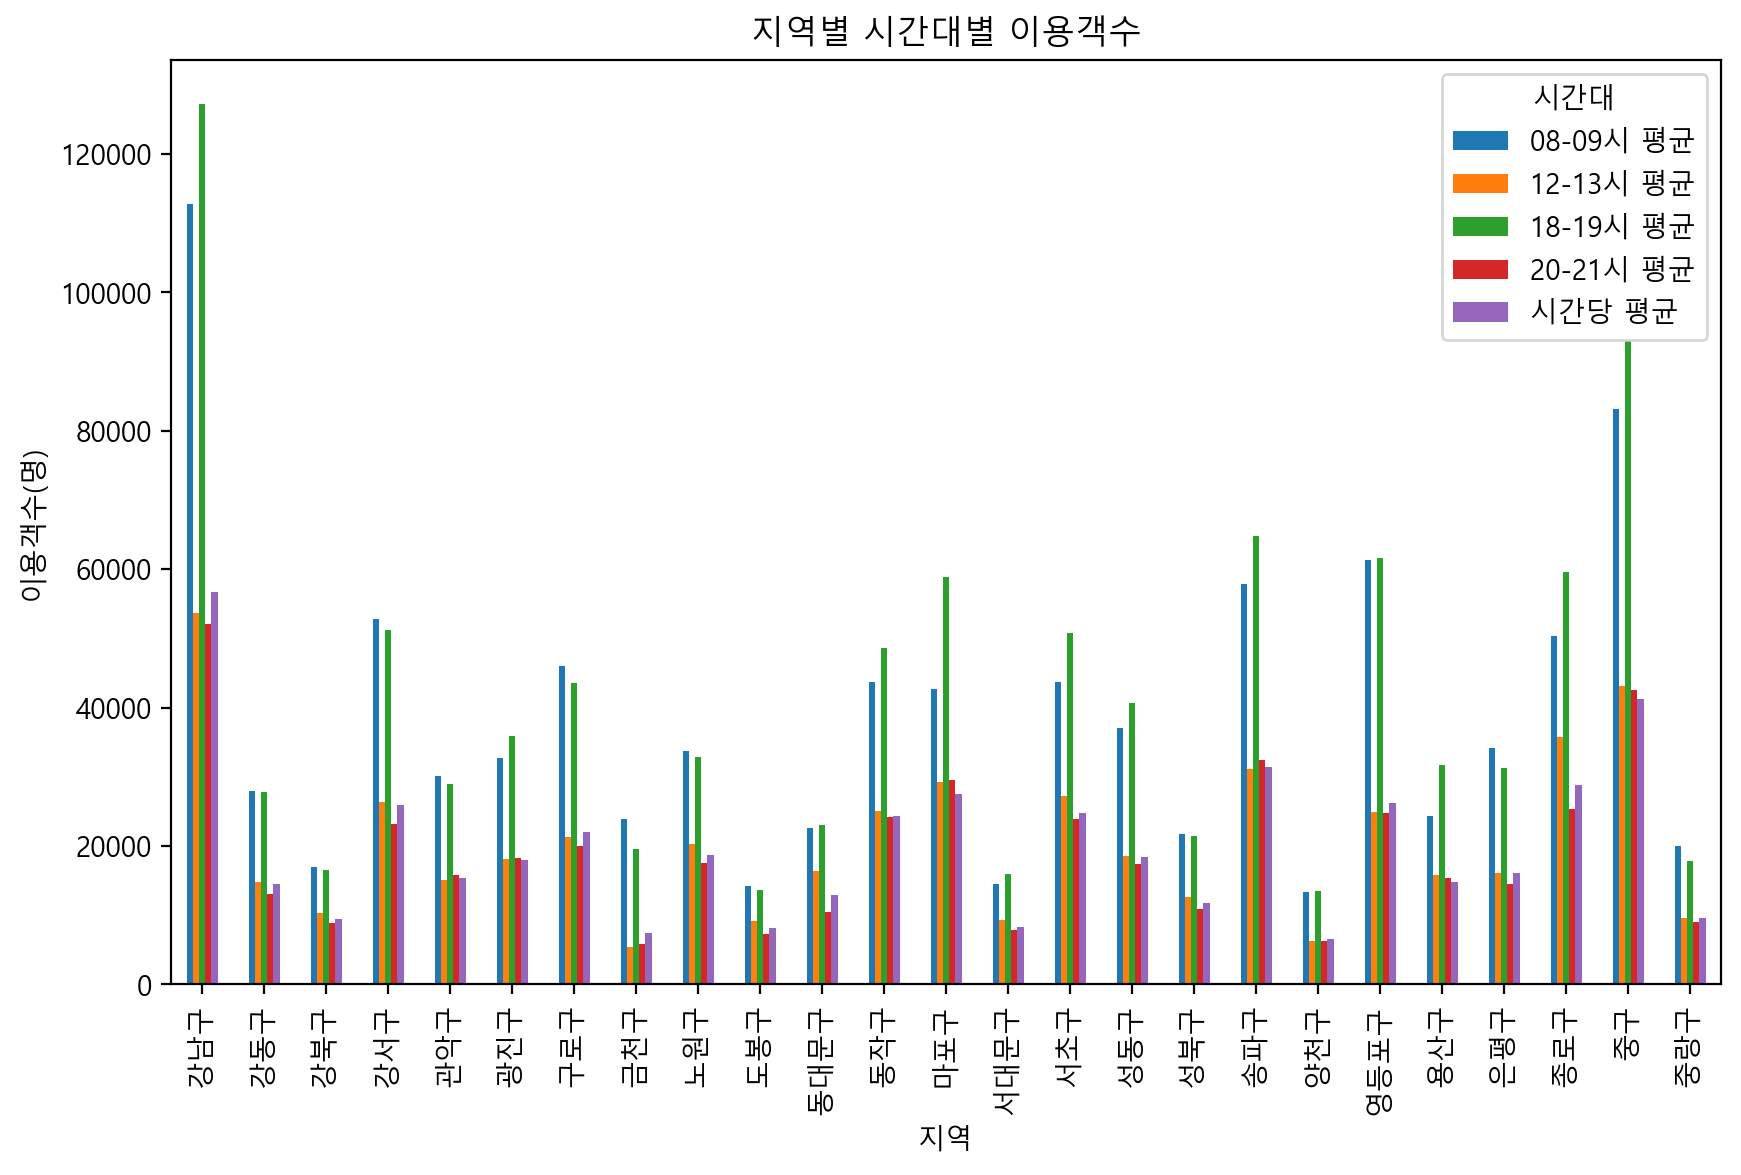

In [88]:
df_pivot = df_subway_use.pivot(index='지역', columns='시간대', values='시간대별하루평균(명)')

# 그래프 그리기
df_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('지역별 시간대별 이용객수')
plt.xlabel('지역')
plt.ylabel('이용객수(명)')
plt.legend(title='시간대')
plt.show()

In [59]:
c_url = f'https://viewt.ktdb.go.kr/cong/api/basedPathOD_sgg2sgg.do?&ZONEID=1101000&YEAR=2021&WEEKTYPE=0&TIME=all'
res = requests.get(c_url)
data = res.json()
items = data['RESULT']
zone_info_list = [{'ZONEID': int(item['ZONEID']), 'ZONENAME': item['ZONENAME']} for item in items][:25]
zone_info_list

[{'ZONEID': 1101000, 'ZONENAME': '서울특별시 종로구'},
 {'ZONEID': 1102000, 'ZONENAME': '서울특별시 중구'},
 {'ZONEID': 1103000, 'ZONENAME': '서울특별시 용산구'},
 {'ZONEID': 1104000, 'ZONENAME': '서울특별시 성동구'},
 {'ZONEID': 1105000, 'ZONENAME': '서울특별시 광진구'},
 {'ZONEID': 1106000, 'ZONENAME': '서울특별시 동대문구'},
 {'ZONEID': 1107000, 'ZONENAME': '서울특별시 중랑구'},
 {'ZONEID': 1108000, 'ZONENAME': '서울특별시 성북구'},
 {'ZONEID': 1109000, 'ZONENAME': '서울특별시 강북구'},
 {'ZONEID': 1110000, 'ZONENAME': '서울특별시 도봉구'},
 {'ZONEID': 1111000, 'ZONENAME': '서울특별시 노원구'},
 {'ZONEID': 1112000, 'ZONENAME': '서울특별시 은평구'},
 {'ZONEID': 1113000, 'ZONENAME': '서울특별시 서대문구'},
 {'ZONEID': 1114000, 'ZONENAME': '서울특별시 마포구'},
 {'ZONEID': 1115000, 'ZONENAME': '서울특별시 양천구'},
 {'ZONEID': 1116000, 'ZONENAME': '서울특별시 강서구'},
 {'ZONEID': 1117000, 'ZONENAME': '서울특별시 구로구'},
 {'ZONEID': 1118000, 'ZONENAME': '서울특별시 금천구'},
 {'ZONEID': 1119000, 'ZONENAME': '서울특별시 영등포구'},
 {'ZONEID': 1120000, 'ZONENAME': '서울특별시 동작구'},
 {'ZONEID': 1121000, 'ZONENAME': '서울특별시 관악구'},
 {'ZONEID':

## 지역별 자동차 이용량

In [86]:
# 지역별 자동차 이동량 데이터 가져오기
in_out_count = []
for ZONEID, i in zip(range(1101000, 1125001, 1000), range(0,25)):
    IN = 0
    OUT = 0
    for item in zone_info_list:
        if item['ZONEID'] == ZONEID:
            start_zone = item['ZONENAME']
    car_move_url = f'https://viewt.ktdb.go.kr/cong/api/basedPathOD_sgg2sgg.do?&ZONEID={ZONEID}&YEAR=2021&WEEKTYPE=0&TIME=all'
    res = requests.get(car_move_url)
    data = res.json()
    items = data['RESULT']
    
    in_out_list = [{'ZONEID': int(item['ZONEID']), 'ZONENAME': item['ZONENAME'], 'VALUE' : item['VALUE']} for item in items]
    for item in in_out_list:
        IN += item['VALUE']['IN']
        OUT += item['VALUE']['OUT']
    in_out_count.append({'ZONEID': ZONEID, 'ZONENAME': start_zone, 'IN': IN, 'OUT': OUT})
    
df_in_out_count = pd.DataFrame(in_out_count)
df_in_out_count = df_in_out_count[['ZONENAME', 'IN', 'OUT']].rename(columns={'ZONENAME': '지역'})
df_in_count = df_in_out_count[['지역', 'IN']]
df_out_count = df_in_out_count[['지역', 'OUT']]

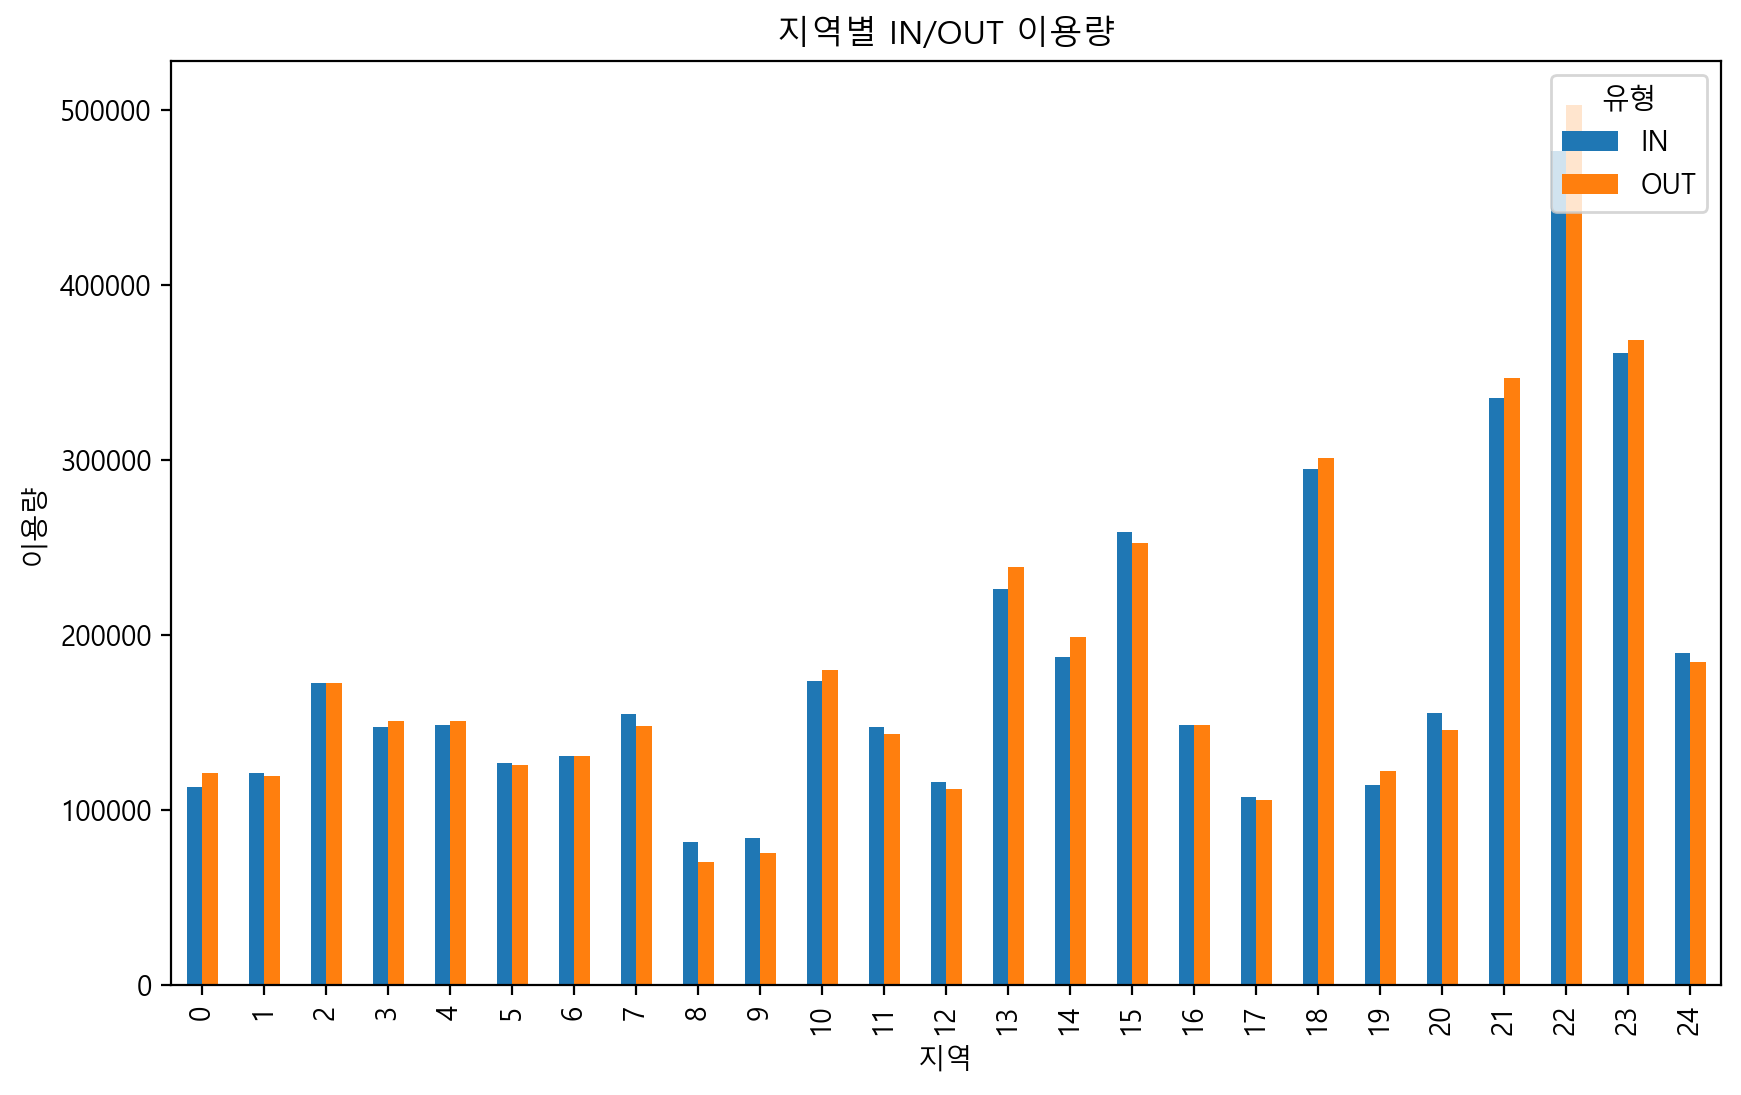

In [61]:
df_in_out_count = df_in_out_count.drop('ZONEID', axis=1)
df_in_out_count.plot(kind='bar', figsize=(10, 6))
plt.title('지역별 IN/OUT 이용량')
plt.xlabel('지역')
plt.ylabel('이용량')
plt.legend(title='유형', loc='upper right')
plt.show()


## 지역별 건물 개수

In [97]:
num_building =pd.read_csv('num_building.csv')
num_building_df = pd.DataFrame(num_building)
num_building_df= num_building_df.drop(['날짜', '부동산 유형'], axis=1)
num_building_df = num_building_df[num_building_df['면적'] != '전체']
num_building_df = num_building_df.drop(['면적비율(%)'], axis=1)
num_building_df

,부동산지역,면적,부동산수(개)
1,강남구,0 ~ 40㎡,74718
2,강남구,41㎡ ~ 85㎡,85433
3,강남구,86㎡ ~ 135㎡,38395
4,강남구,136㎡ ~ 198㎡,19089
5,강남구,199㎡ 이상,4955
...,...,...,...
170,중랑구,41㎡ ~ 85㎡,67167
171,중랑구,86㎡ ~ 135㎡,7512
172,중랑구,136㎡ ~ 198㎡,444
173,중랑구,199㎡ 이상,357


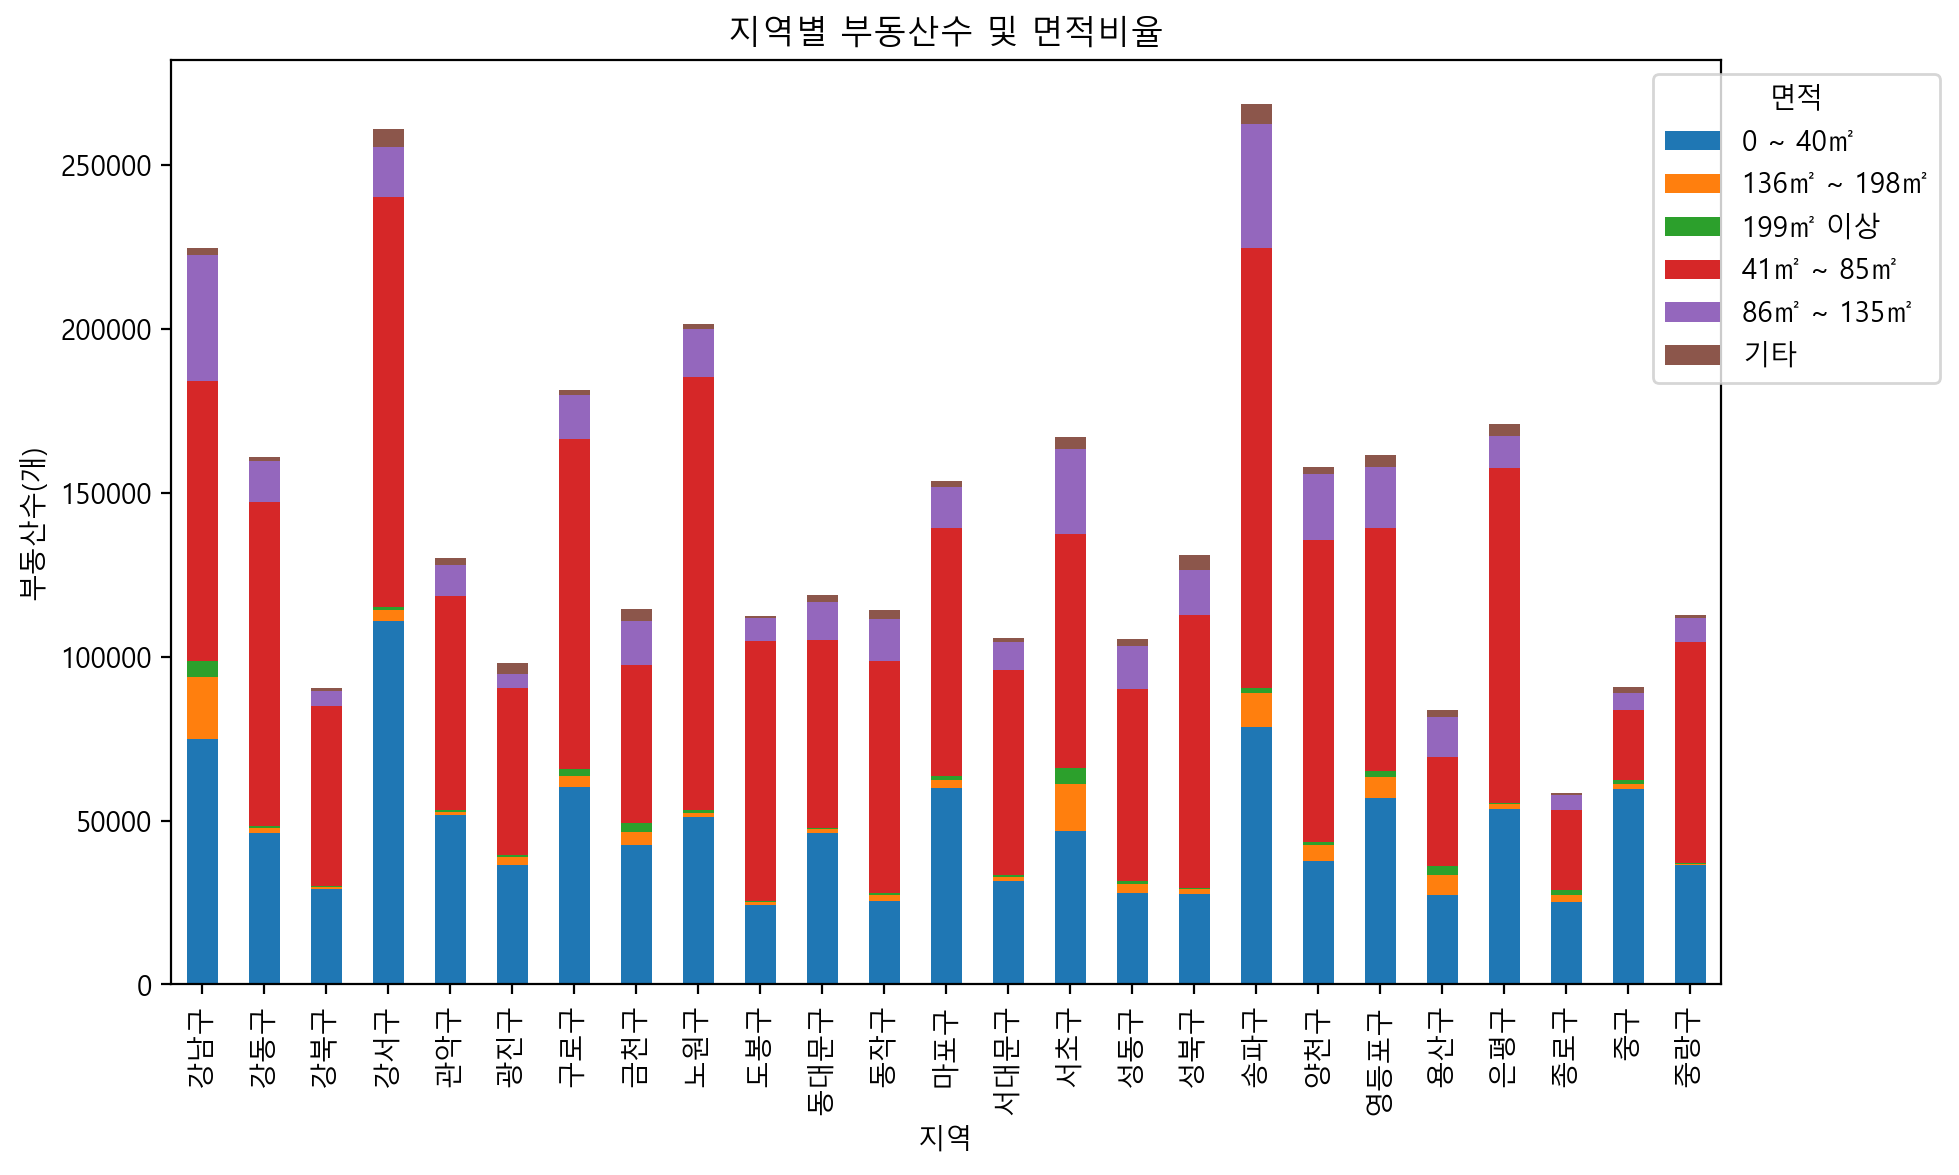

In [98]:
df_pivot = num_building_df.pivot(index='부동산지역', columns='면적', values='부동산수(개)')

# 그래프 그리기
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('지역별 부동산수 및 면적비율')
plt.xlabel('지역')
plt.ylabel('부동산수(개)')
plt.legend(title='면적', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

## 지역별 학생 수

In [83]:
high_num = pd.read_csv('high_num.csv')
high_num_df = pd.DataFrame(high_num).iloc[1:26, [2,7]]
high_num_df

,지역,학생(명)
1,강남구,17403
2,강동구,10839
3,강북구,5120
4,강서구,13149
5,관악구,8478
6,광진구,7253
7,구로구,8817
8,금천구,3726
9,노원구,17140
10,도봉구,5906


In [82]:
middle_num = pd.read_csv('middle_num.csv')
middle_num_df = pd.DataFrame(middle_num).iloc[1:26, [2,7]]
middle_num_df

,지역,학생(명)
1,강남구,16500
2,강동구,10946
3,강북구,5696
4,강서구,10312
5,관악구,6314
6,광진구,6674
7,구로구,7889
8,금천구,3631
9,노원구,13782
10,도봉구,5839


In [71]:
uni_num = pd.read_excel('uni_num.xlsx')
uni_num_df = pd.DataFrame(uni_num).iloc[1:, :2]
uni_num_df = uni_num_df.rename(columns={'행정구역별':'행정구', '2023' :'대학생수'})
uni_num_df

c:\Users\hwnam\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,행정구,대학생수
1,종로구,27338
2,중구,20545
3,용산구,12231
4,성동구,30114
5,광진구,39461
6,동대문구,44252
7,중랑구,8536
8,성북구,81492
9,강북구,3151
10,도봉구,6507


## 지역별 면적

In [67]:
goo_info = pd.read_excel('goo_info.xlsx')
goo_info_df = pd.DataFrame(goo_info).iloc[2:, 1:3]
goo_info_df = goo_info_df.rename(columns={'자치구별(2)': '소속수', '2022' : '면적'})
goo_info_df


c:\Users\hwnam\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,소속수,면적
2,소계,605.21
3,종로구,23.91
4,중구,9.96
5,용산구,21.87
6,성동구,16.82
7,광진구,17.06
8,동대문구,14.22
9,중랑구,18.5
10,성북구,24.58
11,강북구,23.6


In [78]:
traffic_user = pd.read_csv('trafic_user.csv')
traffic_user_df = pd.DataFrame(traffic_user)

traffic_user_df = traffic_user_df.groupby(['지역', '항목'])['월 총(명)'].mean().reset_index()
bus_user_df = traffic_user_df[traffic_user_df['항목'] == '버스']
subway_user_df = traffic_user_df[traffic_user_df['항목'] == '지하철']
bus_user_df = bus_user_df.drop('항목', axis=1)
subway_user_df = subway_user_df.drop('항목', axis=1)
bus_user_df

,지역,월 총(명)
0,강남구,1.717323e+07
2,강동구,5.955631e+06
4,강북구,9.742048e+06
6,강서구,9.476828e+06
8,관악구,1.511914e+07
10,광진구,5.807374e+06
12,구로구,1.026499e+07
14,금천구,7.421641e+06
16,노원구,8.635064e+06
18,도봉구,6.705999e+06


In [79]:
subway_user_df

,지역,월 총(명)
1,강남구,3.584361e+07
3,강동구,9.013447e+06
5,강북구,5.966186e+06
7,강서구,1.438899e+07
9,관악구,9.950634e+06
11,광진구,1.141278e+07
13,구로구,1.357861e+07
15,금천구,4.890644e+06
17,노원구,1.152272e+07
19,도봉구,5.229198e+06


In [1]:
print(subway_user_df.dtypes)

NameError: name 'subway_user_df' is not defined